## Classical Mechanics - Week 3

### Last week we:
- Gained more practice with plotting in Python
- Became familiar with arrays and representing vectors with such objects
- Utilized more complex analytical solutions in functions
 
### This week we will:
- Introduce drag into our analytical solutions
- Learn and utilize Euler's Method to computationally solve for motion
- Compare analytical and computational solutions 

In [1]:
## let's start by importing useful packages we are familiar with
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# More practice with arrays:

Last week we learned about arrays and saw their potential usefulness. Please set up the following variables:
- $v_0 = 150\ m/s$
- $\theta = 80^{\circ}$
- $v_{0z} = v_0\sin(\theta)$
- $v_{0x} = v_0\cos(\theta)$
- Calculate $t_f$ with the same equation used last week: $t_f =\dfrac{2v_{0z}}{g}$
    

Then set up four arrays: 

- Time array $t$ going from 0 to $t_f$ with step sizes of 0.01

- Acceleration vector $\vec{a} = <0,0,-g>$ 

- Initial velocity vector $\vec{v_i} = <v_{0x} , 0 , v_{0z}>$ 

- Initial position vector $\vec{r_i} = <0, 0, 0>$

We have given you a skeleton along with the set up for the $\vec{v_i}$ vector as an example of how to set up your arrays. **REMEMBER to convert your theta from degrees to radians!**

In [2]:
v0 = 150# m/s
theta_deg = 30# degrees
theta_rad = np.radians(theta_deg)# radians
v0_z = v0*np.sin(theta_rad)# Initial velocity in z direction
v0_x = v0*np.cos(theta_rad)# Initial velocity in x direction
g = 9.8# m/s^2
tf = 2*v0_z/g# s
t = np.arange(0,tf,0.01)# time array

a = np.array([np.zeros(len(t)),np.zeros(len(t)),-g*np.ones(len(t))])# Create acceleration array 
v_i = np.array([np.ones(len(t))*v0_x, np.zeros(len(t)), np.ones(len(t))*v0_z]) # Initial velocity array 
r_i = np.array([np.zeros(len(t)),np.zeros(len(t)),np.zeros(len(t))])# Create initial position array

Text(0, 0.5, 'z (m)')

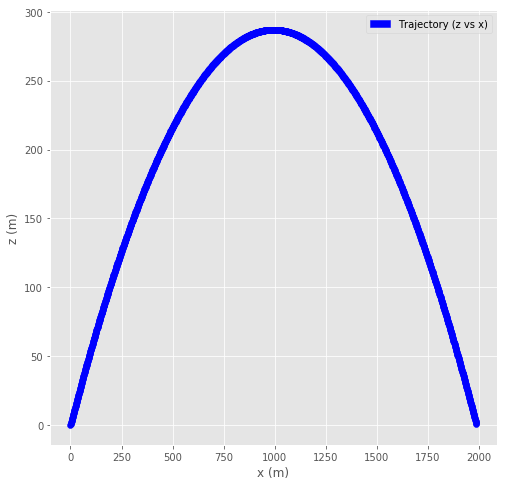

In [3]:
# Run this cell after you have the above completed 
r = r_i + v_i*t + 0.5*a*t**2 # Calculates position over time

# The following makes a plot of the trajectory of z vs x.
%matplotlib inline
import matplotlib.patches as mpatches

plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(r[0], r[2], color = 'b')
blue_patch = mpatches.Patch(color = 'b', label = 'Trajectory (z vs x)')
plt.legend(handles=[blue_patch])
plt.xlabel("x (m)")
plt.ylabel("z (m)")   

# As we learned through class / text books
#### With air resistance factored in (assuming linear drag), the acceleration for vertical motion is:
eq 1) $a_y = - v_y/\tau - g$

where $\tau$ is the time constant (in seconds) for the decay of the velocity.  (Here, $y$ is the vertical direction with upward positive.)

#### Performing an integration, we get the vertical velocity at time t with linear drag air resistance:
eq 2) $v_{y}(t) =  -v_\mathrm{ter}+ (v_{0y} + v_\mathrm{ter})e^{- t/\tau}\,,$

where $v_\mathrm{ter}=g\tau$ is the terminal speed.


# Let's see how the velocity and acceleration affect each other when drag is factored in! 
Let's throw a ball upwards with initial speed $v_i = 20\ m/s$. We will assume linear drag with a time constant of $\tau=10\ $ seconds. (Note that this is enough information to determine the terminal speed of the ball.) Insert the given value for the time constant, tau, and obtain the equation for the initial acceleration in the y direction, ay, below. Then run the cell below to see what the y acceleration would be immediately after throwing the ball. 

In [4]:
## Initalized variables
vi = 20# m/s
g = 9.8# m/s^2
tau = 10 # s, time constant

## Using eq 1 to calculate the acceleration with drag factored in
ay = -g-vi/tau# m/s^2

print("ay = ", ay, "m/s^2")

ay =  -11.8 m/s^2


# Q1.) What did you get for the initial acceleration? Does this make sense?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

# Now we will introduce [Euler's Method](https://en.wikipedia.org/wiki/Euler_method) to solve for our motion

### But first, we need to discuss "step size" and "time steps":
Step size $h$ is defined as the difference between any two neighboring values in time (time steps) that we analyze within some range. It can be determined by dividing the interval we are analyzing, which in our case is time $(t)$, by the number of steps we are taking $(N)$. Thus step size $h = \dfrac{t}{N}$. However, do notice that in the example below we define our range $t$, and step size $h$, making $N = \dfrac{t}{h}$ the dependent variable in our case.

### Short reminder on Euler's Method:
[To be precise, this is Euler's "Forward" method, because we solve forward in steps from $f(x)$ to $f(x+h)$.]

Suppose we know $f(x)$ and its derivative $f'(x)$. To find $f(x+h)$ at the next step, $x+h$,
we can consider the Taylor expansion:

$f(x+h) = f(x) + \dfrac{hf'(x)}{1!} + \dfrac{h^2f''(x)}{2!} + ...$

If we ignore the $f''$ term and higher derivatives, we obtain

$f(x+h) \approx f(x) + hf'(x)$.

This approximation is the basis of Euler's method, and the Taylor expansion suggests that it will have errors of $O(h^2)$.  Thus, one would expect it to work better, the smaller the step size $h$ that you use.

We shall calculate with different values of $h$ and compare to the analytical solutions.  (In general, there
may not be analytical solutions to compare with, so one will need to consider other methods to make sure the
numerical solution is correct.)

## Specifics of Euler's Forward Method for motion:
With Euler's method we will be updating the velocity $(v[i+1])$ starting with our previous velocity $(v[i])$ and adding the previous acceleration multiplied by the time step $(a[i]*dt)$. (Convince yourself that this is exactly the approximate formula presented above.)

The updated position is obtained by the same method. Below is a more detailed outline.


#### Performing Euler's Method for this problem we will do the following steps:

1.) Define and obtain all initial values, constants, and time to be analyzed with step sizes

2.) Calculate the velocity using $v_{i+1} = v_{i} + h*a_{i}$

3.) Calculate the position using $pos_{i+1} = pos_{i} + h*v_{i}$

2.) Calculate the new acceleration $a_{i+1}$ using eq 1 with $v_{i+1}$. 

5.) Repeat steps 2-4 for all time steps within a loop.

# Q2.) If we wanted to analyze a time interval, $t$, of 20 seconds with step sizes, $h$, of 0.1 what would the number of steps, $N$, be?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.


Let's look at a thrown ball and see how Euler's Method compares to the analytical solution. Our initial conditions will be as follows:

- $v_i = 20\ m/s$ upwards
- $g = 9.8\ m/s$ 
- $\tau = 10\ s$


We already provide you with an outline of Euler-implemented code.  Complete the code, following the comments. Make sure to follow the procedures given by our explanations above, and then run the three cells below to see the outcome. (Only the first 2 cells need to be modified by you.)

In [5]:
# Initial values and constants

vi = 20# m/s
g = 9.8# m/s^2
tau = 10# s

ay = -vi/tau-g# m/s^2

tf = 5 #The final time
dt = .3 # time step size

t = np.arange(0.0,tf,dt) # Creates an evenly spaced time array going from 0 to 3, with step sizes .1
a = np.zeros(len(t))# Create an array of zeros for [ay] values. Storage same as number of steps, N
v = np.zeros(len(t))# Create an array of zeros for [vy] values. Storage size is N
r = np.zeros(len(t))# Create an array of zeros for [y] values. Storage size is N

v[0] = vi # Sets initial velocities
a[0] = ay # Sets initial accleration

In [6]:
# Performing Euler's method
for i in range(0,len(t)-1):
    v[i+1] = v[i]+dt*a[i]# Insert Euler's method formula for updating velocity
    r[i+1] = r[i]+dt*v[i]# Insert Euler's method formula for updating position
    a[i+1] = -v[i+1]/tau-g# Update acceleration using eq. 1 and inserting v[i+1] for v
    

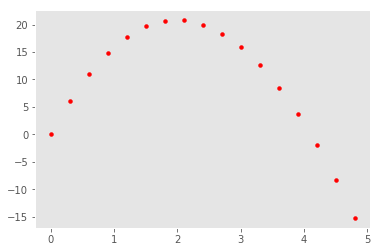

In [7]:
# Plotting the results
plt.scatter(t,r,s=15, c='r') # Plots the individual points instead of making lines like plt.plot() does
plt.grid() # Adds a grid to our plot
plt.show() # Shows our plot. This comman is neseccary if you are using python ourside Jupyter Notebook.

## Compare the computational analysis versus expected values

You will need to input the analytical formula for $y(t)$, analogous to eqs. 1) and 2) above, with $y(0)=0$.

In [8]:
# We re-create the time array for our analytical solution, 
# since it shouldn't depend on the step size for the Euler solution.
ta = np.arange(0.0,tf,.01) 
vter=g*tau
y = (vi+vter)*tau*(1-np.exp(-ta/tau))-vter*ta# Insert the analytical equation for our motion y(ta), obtained from integrating eq. 2).

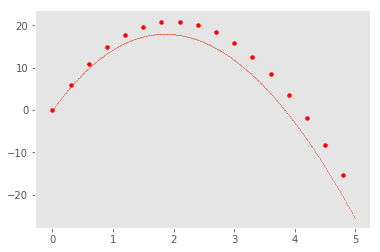

In [9]:
### Plot our analytical and computational solutions 
plt.scatter(ta,y, s = .1)
plt.scatter(t,r,s=15, c='r')
plt.grid()
plt.show()

# Let's perform the analysis for different values of h to see how our computation changes.
Create a function that implements Euler's method for a tossed ball and plots the computationally calculated solution against the analytical solution. Use it to plot three different graphs of $y$ versus $t$, each with a different $h$ size, but with the same initial values.

(Recall that you implemented a similar function for the ball toss in Notebook 1, but without air resistance.
You may find it useful to look back at that if you need guidance.)

In [10]:
def EulerBallToss(vi, tau, tf, dt):
    # Initial values and constants

    g = 9.8# m/s^2

    ay = -vi/tau-g# m/s^2

    t = np.arange(0.0,tf,dt) # Creates an evenly spaced time array going from 0 to 3, with step sizes .1
    a = np.zeros(len(t))# Create an array of zeros for [ay] values. Storage same as number of steps, N
    v = np.zeros(len(t))# Create an array of zeros for [vy] values. Storage size is N
    r = np.zeros(len(t))# Create an array of zeros for [y] values. Storage size is N

    v[0] = vi # Sets initial velocities
    a[0] = ay # Sets initial accleration
    
    # Performing Euler's method
    for i in range(0,len(t)-1):
        v[i+1] = v[i]+dt*a[i]# Insert Euler's method formula for updating velocity
        r[i+1] = r[i]+dt*v[i]# Insert Euler's method formula for updating position
        a[i+1] = -v[i+1]/tau-g# Update acceleration using eq. 1 and inserting v[i+1] for v
    
    # We re-create the time array for our analytical solution, 
    # since it shouldn't depend on the step size for the Euler solution.
    ta = np.arange(0.0,tf,.01) 
    vter=g*tau
    y = (vi+vter)*tau*(1-np.exp(-ta/tau))-vter*ta# Insert the analytical equation for our motion y(ta), obtained from integrating eq. 2).   
    
    ### Plot our analytical and computational solutions 
    plt.scatter(ta,y, s = .1)
    plt.scatter(t,r,s=15, c='r')
    plt.grid()
    plt.show()
    

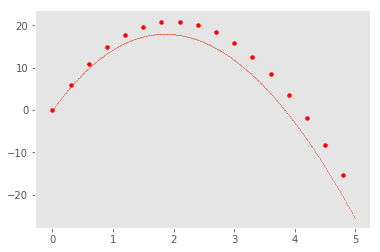

In [11]:
EulerBallToss(20,10,5,.3)

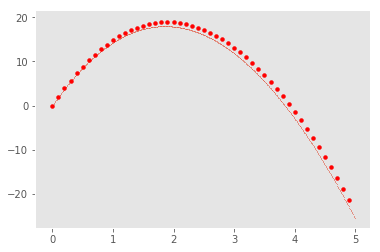

In [12]:
EulerBallToss(20,10,5,.1)

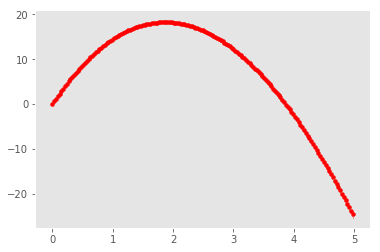

In [13]:
EulerBallToss(20,10,5,.03)

# Q3.) Play around with different values of dt and comment how it affects our graph.

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

# Notebook Wrap-up. 
Run the cell below and copy-paste your answers into their corresponding cells.

In [14]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/cS1Ciz9geXKBFns76" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Another week, another completed Notebook!
We are now beginning to take a dive into computational methods. They have many benefitg, proving to be very powerful tools in research. Hopefully arrays are starting to make more sense now, also. [Here is a link to a funny video dealing with projectile motion and quadratic drag](https://www.youtube.com/watch?v=-5Ilq3kFxek). 